<a href="https://colab.research.google.com/github/kachytronico/Cursos-Colab-BDA/blob/main/BDA01_Tarea_evaluacion_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

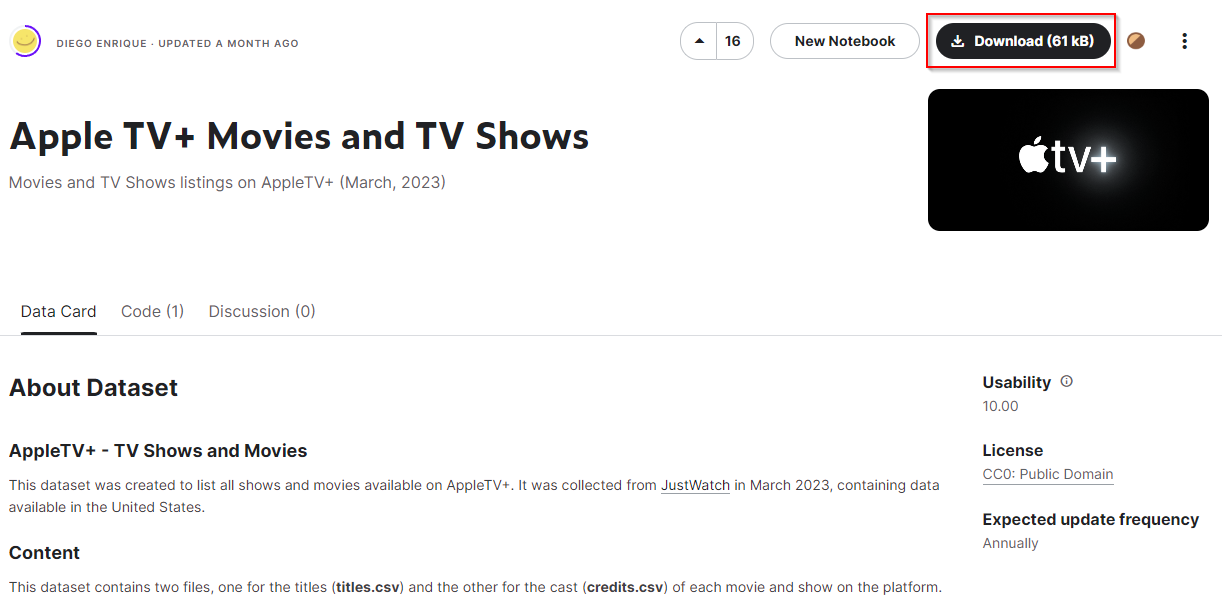

En mi caso he elegido un Datasheet de Apple TV+.
Ya que consta de dos CSV (titles.csv y credits.csv) y estos se pueden
relacionar entre ellos mediante un identificador (id: The title ID on JustWatch).
Así podemos saber qué actores y qué directores han actuado y dirigido las
diferentes películas y series.
Al descargarnos los Datasheet de Kaggle los datos ya se encuentran
bastante “optimizados” por lo que deduzco no será necesario realizar
mucha tarea de limpieza y transformación sobre ellos.

También los puedes descargar de la carpeta de drive:
 https://drive.google.com/drive/folders/1b5V2EntQcNz0BhaK2HhUzKq_K-IhwXsr?usp=drive_link

Recuerda cargar los Datashet en el proyecto de Google Collaboratory:

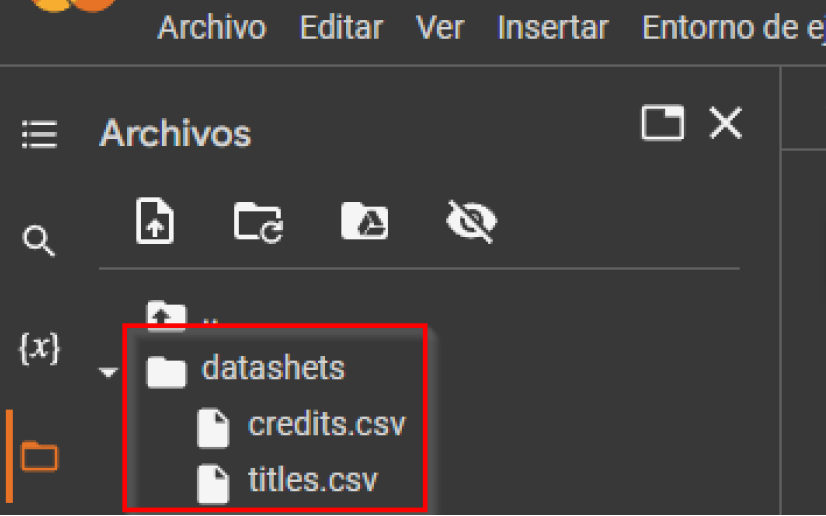

# Las LIMPIEZAS de datos que vamos a realizar son las siguientes:


### Perfilado de datos (Data Profiling):
Consiste en analizar los datos para identificar
incoherencias o anomalías que deban corregirse.

In [1]:
import pandas as pd

# Load the data into a pandas dataframe
titlesdf = pd.read_csv("datashets/titles.csv")
creditsdf = pd.read_csv("datashets/credits.csv")

# Display the first few rows of the dataframes
print("First few rows of the dataframe:")
print(titlesdf.head())
print("----------------------------------------")
print(creditsdf.head())

# Get the data types of each column
print("\nData types of each column:")
print(titlesdf.dtypes)
print("----------------------------------------")
print(creditsdf.dtypes)

# Get the number of missing values in each column
print("\nNumber of missing values in each column:")
print(titlesdf.isnull().sum())
print("----------------------------------------")
print(creditsdf.isnull().sum())

# Identify correlations between variables using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(titlesdf.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation heatmap of the Titles dataset")
plt.show()
print("----------------------------------------")
sns.heatmap(creditsdf.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation heatmap of the Credits dataset")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'datashets/titles.csv'

### Normalización de datos (Data Standarization)
Consiste en convertir los datos a un formato
estandarizado para que puedan compararse y analizarse más fácilmente.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the data into a pandas dataframe
titlesdf = pd.read_csv("datashets/titles.csv")
creditsdf = pd.read_csv("datashets/credits.csv")

# Select the numerical columns to standardize
num_cols = ['release_year', 'runtime', 'seasons', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']

# Create a StandardScaler object and fit it to the data
scaler = StandardScaler()
scaler.fit(titlesdf[num_cols])

# Apply the scaler to the data and create a new dataframe
scaled_data = scaler.transform(titlesdf[num_cols])
scaled_titlesdf = pd.DataFrame(scaled_data, columns=num_cols)

# Display the first few rows of the scaled dataframe
print("First few rows of the scaled dataframe:")
print(scaled_titlesdf.head())

# Compare the mean and standard deviation of the original and scaled data
print("\nMean and standard deviation of the original data:")
print(titlesdf[num_cols].mean())
print(titlesdf[num_cols].std())

print("\nMean and standard deviation of the scaled data:")
print(scaled_titlesdf.mean())
print(scaled_titlesdf.std())

# Save dataframe data standarization
from google.colab import files
scaled_titlesdf.to_csv('datashets/scaled_titles.csv', encoding = 'utf-8-sig')
files.download('datashets/scaled_titles.csv')

### Validación de datos (Data Validation)
Se trata de comprobar que los datos son exactos y
completos.

In [ ]:
import pandas as pd

# Load the data into a pandas dataframe
titlesdf = pd.read_csv("datashets/titles.csv")
creditsdf = pd.read_csv("datashets/credits.csv")

# Define validation rules
rules = {
    'release_year': lambda x: x > 1800,  # Year
    'runtime': lambda x: x > 1,  # Runtime
    'seasons': lambda x: x > 1 and x < 10,  # Seasons
    'imdb_score': lambda x: x > 0 and x < 10,  # Score
    'type': lambda x: x in ['MOVIE', 'SHOW'],  # Role
}

rules2 = {
    'role': lambda x: x in ['ACTOR', 'DIRECTOR'],  # Role
}


# Validate titles data
for col, rule in rules.items():
    invalid_rows = titlesdf [~titlesdf [col].apply(rule)].index
    if len(invalid_rows) > 0:
        titlesdf .loc[invalid_rows, col] = None  # Set invalid values to None
display(titlesdf)

# Validate credits data
for col, rule in rules2.items():
    invalid_rows = creditsdf[~creditsdf[col].apply(rule)].index
    if len(invalid_rows) > 0:
        creditsdf.loc[invalid_rows, col] = None  # Set invalid values to None
display(creditsdf)

# Las TRASFORMACIONES de datos que vamos a realizar son las siguientes:

### Normalización de datos (Data Normalization)
Se trata de ajustar los datos para que se ajusten a
un conjunto específico de normas o criterios.

In [ ]:
import pandas as pd

# Load the data into a pandas dataframe
titlesdf = pd.read_csv("datashets/scaled_titles.csv")

#View the first five rows of the dataframe
titlesdf.head(5)

#Remove column seasons
titlesdf.drop(['seasons'], axis=1)

#Remove null
titlesdf.isnull().any()

titlesdf.dropna(axis=1, inplace=True)

# Save dataframe data merged
from google.colab import files
titlesdf.to_csv('titlesdf.csv', encoding = 'utf-8-sig')
files.download('titlesdf.csv')


### Integración de datos
Consiste en combinar datos de múltiples fuentes en
un único conjunto de datos para su análisis.

In [ ]:
import pandas as pd

# Load the data into a pandas dataframe
titlesdf = pd.read_csv("datashets/titles.csv")
creditsdf = pd.read_csv("datashets/credits.csv")

# merge datasets
appletvdf = pd.merge(titlesdf, creditsdf, left_on='id', right_on='id')

# drop duplicate column
appletvdf = appletvdf.drop(columns=['id'])

# display merged dataset
print(appletvdf.head())

# Save dataframe data merged
from google.colab import files
appletvdf.to_csv('appletvdf.csv', encoding = 'utf-8-sig')
files.download('appletvdf.csv')



# Para validar las técnicas de Big Data en la toma de decisiones en BI

### Validación cruzada(Cross-validation)
Esta técnica consiste en dividir el conjunto de datos
en múltiples subconjuntos y probar el modelo en cada subconjunto,
asegurando que el modelo está generalizando bien.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Load data
names = ['release_year', 'runtime', 'seasons', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']
titlesdf = pd.read_csv("datashets/titles.csv", names=names)

# Separate features and target variable
X = titlesdf.iloc[:, :-1].values
y = titlesdf.iloc[:, -1].values

# Initialize a decision tree classifier
classifier = DecisionTreeClassifier()

# Perform 10-fold cross-validation
scores = cross_val_score(classifier, X.astype(float), y, cv=10)

# Print the accuracy of each fold and the mean accuracy
for i, score in enumerate(scores):
  print("Accuracy of fold %d: %.2f" % (i+1, score))
  print("Mean Accuracy: %.2f%%" % (scores.mean()*100))


### Prueba de hipótesis(Hypothesis testing)
Esta técnica consiste en formular una hipótesis sobre
los datos y probarla mediante métodos estadísticos para determinar su
validez.

In [ ]:
import numpy as np
from scipy import stats

# generate two random samples with a mean difference
sample1 = np.random.normal(5, 2, 100)
sample2 = np.random.normal(7, 2, 100)

# perform a two-sample t-test with equal variances assumed
t_stat, p_val = stats.ttest_ind(sample1, sample2, equal_var=True)

# print the results
print("t-statistic: {:.4f}".format(t_stat))
print("p-value: {:.4f}".format(p_val))

# perform a two-sample t-test with equal variances not assumed
t_stat, p_val = stats.ttest_ind(sample1, sample2, equal_var=False)

# print the results
print("t-statistic: {:.4f}".format(t_stat))
print("p-value: {:.4f}".format(p_val))

### Detección de valores atípicos (Outlier detection)
Los valores atípicos pueden afectar en gran
medida a la precisión de un modelo. Las técnicas de detección de valores
típicos pueden ayudar a identificarlos y eliminarlos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Generate random data
np.random.seed(42)
X = 0.3 * np.random.randn(100, 2)
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X + 2, X - 2, X_outliers]

# Fit the LOF model to the data
clf = LocalOutlierFactor(n_neighbors=20)
y_pred = clf.fit_predict(X)

# Plot the data points and mark the outliers
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3.0, label='Data points')
plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], color='r', s=20.0, label='Outliers')
plt.legend()
plt.show()

### Análisis de errores(Error analysis)
Esta técnica consiste en analizar los errores cometidos
por un modelo e identificar las causas de esos errores. Esto puede ayudar
a mejorar el modelo y aumentar su precisión.

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame

names = ['release_year', 'runtime', 'seasons', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']
titlesdf = pd.read_csv("datashets/titles.csv", names=names)

# Check for missing values
print(titlesdf.isna().sum())

import numpy as np

# Compute the Z-scores for each column
z_scores = np.abs((titlesdf - titlesdf.mean()) / titlesdf.std())

# Print the rows with any Z-scores greater than 3
print(titlesdf[z_scores > 3])

import matplotlib.pyplot as plt

# Create a histogram
plt.hist(titlesdf['release_year'])
plt.xlabel('Release_Year')
plt.ylabel('Frequency')
plt.show()



### Visualización de datos
Las técnicas de visualización de datos pueden
ayudar a identificar patrones y tendencias en los datos que pueden no ser
evidentes a partir de los datos brutos. Esto puede ayudar a tomar mejores
decisiones.

In [ ]:
import pandas as pd
import numpy as np
import io

# Load the CSV file into a DataFrame
titlesdf = pd.read_csv("datashets/titles.csv", delimiter=",")
creditsdf = pd.read_csv("datashets/titles.csv", delimiter=",")

titlesdf.shape
creditsdf.shape

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 10))
sns.heatmap(titlesdf.corr(), annot=True)
plt.show()


plt.figure(figsize = (20, 10))
sns.heatmap(creditsdf.corr(), annot=True)
plt.show()

titlesdf.sample(5)
creditsdf.sample(5)


titlesdf.info()
creditsdf.info()

Después de realizar las validaciones indicadas, no se encuentran valores atípicos, ya que parece ser los datos están bastante depurados.